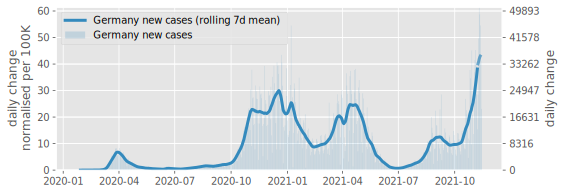

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov
fig, ax = plt.subplots(figsize=(8, 3))
cases, deaths = ov.get_country_data("Germany") 
ov.plot_daily_change(ax=ax, series=cases, color="C1", 
                     labels=("Germany", "cases"));

# COVID19 infections in Germany are increasing. Are the summer holidays to blame?

As in many other (European) countries, we see a marked increase in new daily COVID 19 infections (around August 2020) in [Germany](https://oscovida.github.io/html/Germany.html) as shown in the plot above. 


The reason for this is unclear. We can speculate that two of the possible origins might be or include:

(i) people's perception of the danger from COVID19 has changed after the first wave has passed, and social distancing and hygene measures may not be taken as seriously as before. This will increase the R number which reflects how many people one infected person can infect, and could explain such an increase. 

(ii) the beginning of the summer holidays and associated travel activity is likely to mix people from different regions, people who don't normally meet, and may also be associated with a more relaxed attitude towards social distancing. So the holiday season could also be to blame.

In this notebook, we try to present some data to investigate possibility (ii). 

The answer is not conclusive (and the holiday season has not finished yet), but the plots may be interesting nevertheless.


### Data preparation

In [2]:
germany = ov.fetch_data_germany()
bundeslaender = sorted(germany['Bundesland'].drop_duplicates())

holidays = pd.read_csv("germany-summer-holidays-2020.csv", index_col=0)

# plot parameters
n_bundeslaender = len(bundeslaender)        
plot_start_date='2020-06-01'
plot_end_date='2020-09-30'

## Plot 1: daily new cases per Bundesland, together with summer holiday period

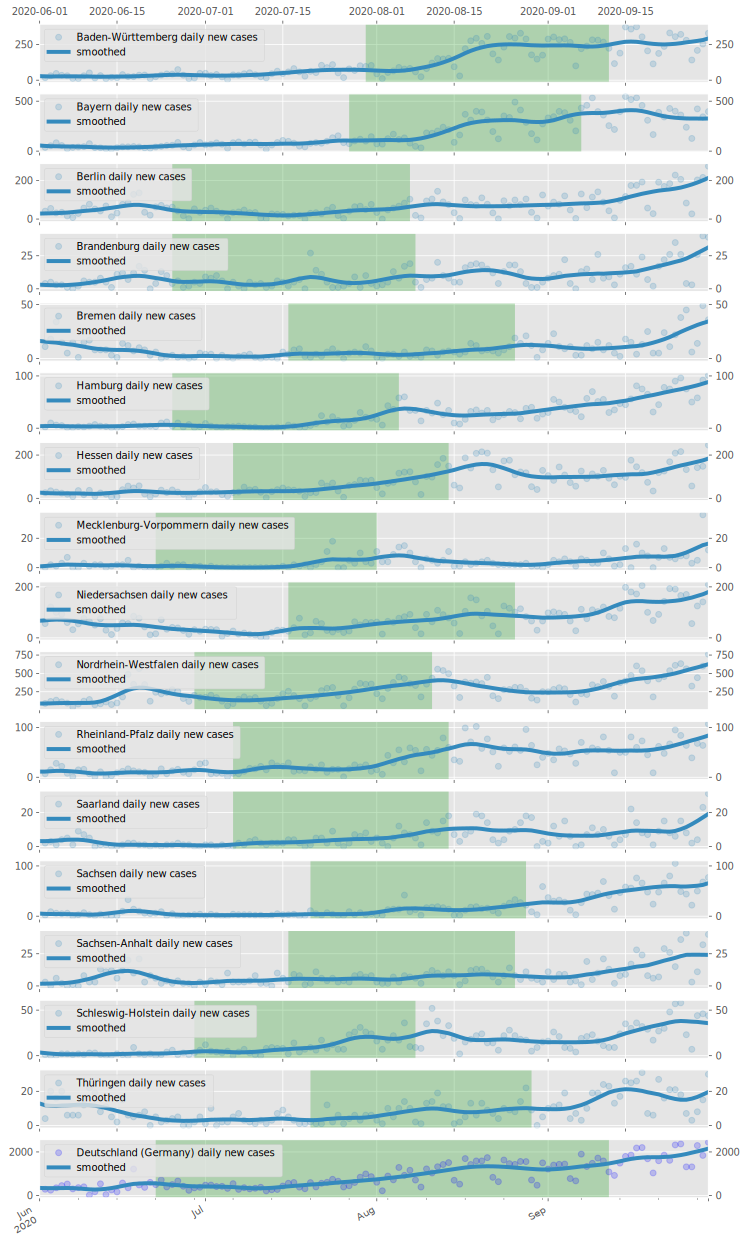

In [3]:
fig, axes = plt.subplots(n_bundeslaender+1, 1, figsize=(12, 24))
for i, region in enumerate(bundeslaender[:n_bundeslaender]):
    ax = axes[i]
    
    cases, deaths = ov.get_country_data("Germany", region=region)
    
    # plot dots for daily changes
    plot_cases = cases[plot_start_date:plot_end_date].diff().dropna()
    ax.plot(plot_cases, 'o', color='C1', alpha=0.2)
    
    # plot smoothed line
    daily, diffsmooth1, diffsmooth2 = ov.compute_daily_change(cases)
    diffsmooth2[0][plot_start_date:plot_end_date].plot(ax=ax, linewidth=4, color='C1')
    
    ax.legend([f"{region} daily new cases", "smoothed"], loc='upper left')
    ax.set_xlim(left=plot_start_date, right=plot_end_date)
    
    # plot holidays
    begin, end = holidays.loc[region]
    ax.axvspan(begin, end, facecolor='#2ca02c', alpha=0.3)
    ax.tick_params(left=True, right=True, labelleft=True, labelright=True)
    ax.yaxis.set_ticks_position('both')

    if i == 100:
        ax.tick_params(top=True, labeltop=True)
        ax.xaxis.set_ticks_position('both')
        ax.xaxis.set_label_position('top') 


if i == 15:   # add overview plot for Germany
    ax = axes[16]
    region = "Deutschland (Germany)"
    cases, deaths = ov.get_country_data("Germany")

    daily, diffsmooth1, diffsmooth2 = ov.compute_daily_change(cases)
    cases[plot_start_date:plot_end_date].diff().plot(ax=ax, style='ob', alpha=0.2)
    diffsmooth2[0][plot_start_date:plot_end_date].plot(ax=ax, linewidth=4, color='C1')

    ax.legend([f"{region} daily new cases", "smoothed"], loc='upper left')
    ax.set_xlim(left=plot_start_date, right=plot_end_date)

    # plot holidays, combining the holiday season into one interval
    begin = holidays.begin.min()
    end = holidays.end.max()
    ax.axvspan(begin, end, facecolor='#2ca02c', alpha=0.3);
    ax.tick_params(left=True, right=True, labelleft=True, labelright=True)
    ax.yaxis.set_ticks_position('both')

    
fig.autofmt_xdate()           # minor plotting improvements
axes[0].tick_params(top=True, labeltop=True)
# fig.savefig('2020-are-summer-holidays-triggering-rising-cases-plot-cases.pdf')

The dots show the number of new infections per day. The line is a smoothed average to make it easier to identify trends. The question is if the blue line starts to grow, and if this is primarily the case during the school holidays.

The last plot at the bottom (which shows accumulated data for Germany) shows this increasing trend from middle of July onwards.

## Plot 2: R-value per Bundesland, together with summer holiday period

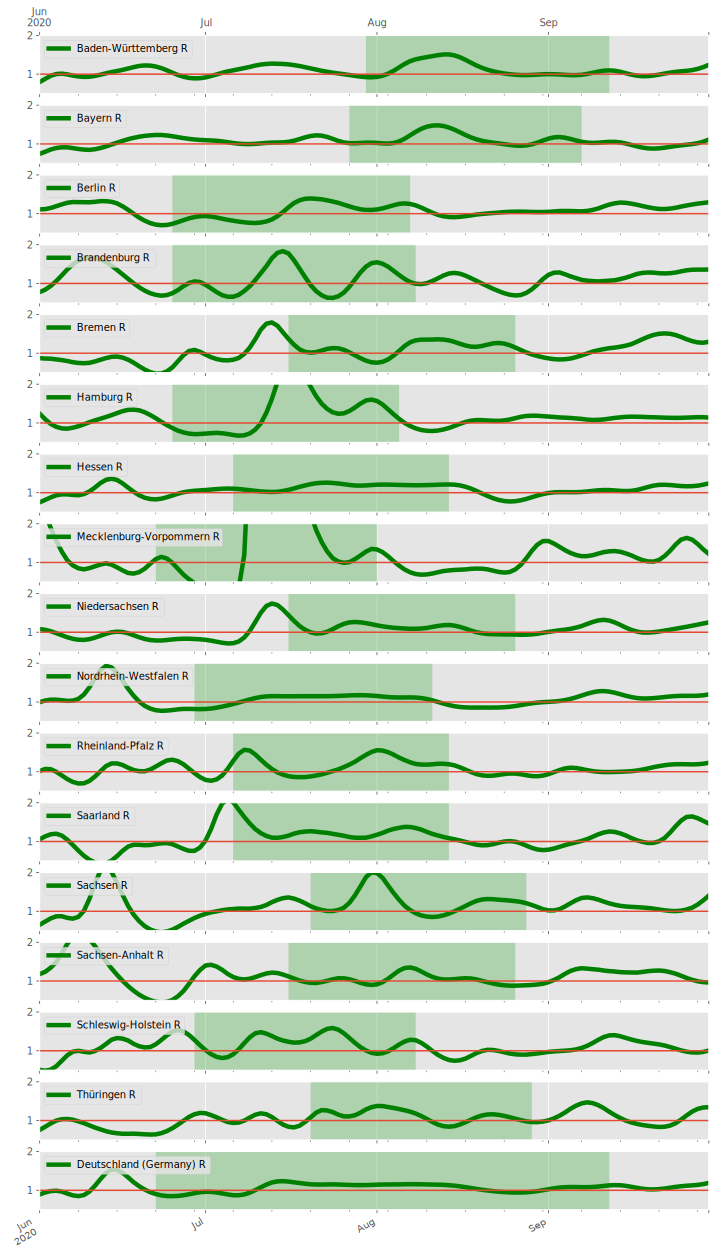

In [4]:
n_bundeslaender = 16
fig, axes = plt.subplots(n_bundeslaender+1, 1, figsize=(12, 24))
for i, region in enumerate(bundeslaender[:n_bundeslaender]):
    ax = axes[i]
    
    # plot COVID data
    cases, deaths = ov.get_country_data("Germany", region=region)
    daily, diffsmooth1, diffsmooth2 = ov.compute_daily_change(cases)
    R = ov.compute_R(diffsmooth2[0])
    
    # reduce data set to what is displayed
    Rplot = R[plot_start_date:plot_end_date]
    Rplot.plot(ax=ax, color='g', linewidth=4.5)

    # Plot line at R = 1
    ax.axhline(y=1)
    
    ax.legend([f"{region} R",], loc='upper left')
    ax.set_xlim(left=plot_start_date, right=plot_end_date)
    ax.set_ylim(bottom=0.5, top=2)
    
    # plot holidays
    begin, end = holidays.loc[region]
    ax.axvspan(begin, end, facecolor='#2ca02c', alpha=0.3)

    
if i == 15:
    # add overview plot for Germany
    ax = axes[16]
    region = "Deutschland (Germany)"
    cases, deaths = ov.get_country_data("Germany")

    daily, diffsmooth1, diffsmooth2 = ov.compute_daily_change(cases)
    R = ov.compute_R(diffsmooth2[0])

    # reduce data set to what is displayed
    Rplot = R[plot_start_date:plot_end_date]
    Rplot.plot(ax=ax, color='g', linewidth=4.5)

    # Plot line at R = 1
    ax.axhline(y=1)

    ax.legend([f"{region} R",], loc='upper left')
    ax.set_xlim(left=plot_start_date, right=plot_end_date)
    ax.set_ylim(bottom=0.5, top=2)

    # plot holidays, combining the holiday season into one interval
    begin = holidays.begin.min()
    end = holidays.end.max()
    ax.axvspan(begin, end, facecolor='#2ca02c', alpha=0.3);

fig.autofmt_xdate()           # minor plotting improvements
axes[0].tick_params(top=True, labeltop=True)

# fig.savefig('2020-are-summer-holidays-triggering-rising-cases-plot-r.pdf')

The thin red line shows the line which corresponds to the R-value being equal to 1. An R-value of 1 means that the number of daily infections will not change (because on average one infected person will infect exactly one other  person). A larger value means that the number of daily new cases will increase. So the question to ask is if the R-value is greater or smaller than 1.0, and if that change correlates with the summer holidays.

The clearest answer is probably given by the last plot which shows the data for the whole of Germany. In that plot, it is visible that the R-value becomes greater than 1 around the middle of July, and remains there (corresponding to an ongoing increase of daily new infections). 

## Discussion

If the holidays season is to blame for the increase, do we expect the numbers of new cases to start growing immediately when the holidays start? No: first people need to travel and return (we can assume one or two weeks for this to take place), and they also need to develop symptoms and be tested - so a delay by a few weeks is probably expected. Similarly, we don't expect numbers to decrease immediately at the end of the holidays, but with a few weeks delay (as people who return from travel on the last day of their holidays, may still take one or two weeks to develop symptoms, be tested, and the test be reported).


The plots of the new cases per day for each Bundesland can be confusing because they have different y-scales. We show absolute numbers here, and scale the y-axis so that the line fills the available space. This allows to see trends, but the impact for infections numbers in Germany overall will depend whether there are 100s of new cases as in Nordrhein-Westfalen or Bavaria, or very few as in Thüringen. Their combined impact can be seen in the summed data for Germany overall. The same is true for the R-values shown in the second plot: an R-value of 1.5 in an area with very few infections results in small total increase of cases across Germany, wheras an R-value of 1.1 in an area with many infections will create more new cases. 

Can we expect the R-value and the number of new infections to drop again when the holiday season is completed (i.e. the middle of September)? If the hypothesis that the travel activity associated with the summer holidays is causing the increased number of new infections, then this would be expected (with a few weeks delay). However, other changes may be taking place the same time: for example the opening of the schools may have an effect. 

(Text written 23 August 2020. Updated 30 August 2020. Code and plots may update automatically without the next being revised.)

### Appendix

Notebook was last executed:

In [5]:
import time
time.asctime()

'Mon Nov 15 17:03:13 2021'

In [6]:
ov.display_binder_link('2020-are-summer-holidays-triggering-rising-cases.ipynb')

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-are-summer-holidays-triggering-rising-cases.ipynb)

Data source for the holidays is https://www.schulferien.org/deutschland/ferien/2020/ :

In [7]:
holidays

,begin,end
state,,
Baden-Württemberg,2020-07-30,2020-09-12
Bayern,2020-07-27,2020-09-07
Berlin,2020-06-25,2020-08-07
Brandenburg,2020-06-25,2020-08-08
Bremen,2020-07-16,2020-08-26
Hamburg,2020-06-25,2020-08-05
Hessen,2020-07-06,2020-08-14
Mecklenburg-Vorpommern,2020-06-22,2020-08-01
Niedersachsen,2020-07-16,2020-08-26


In [8]:
# ov.make_compare_plot_germany(region_subregion="Hamburg", compare_with_local=bundeslaender);